# High-Intensity Compute Workloads

Warning: running this Jupyter notebook most likely will cause your computer to be unresponsive during the computation. Please save your important work before running this notebook.

In [1]:
import zarr
import matplotlib.pyplot as plt

## Choose Data Set

In [2]:
dataset_name = "benchmark_medium_sw_aes128_compressed.zarr"
#dataset_name = "benchmark_medium_sw_aes128.zarr"

In [3]:
dataset = zarr.open(dataset_name, "r")

## SNR with SCARR (all 16 byte positions)

Computing the Signal-to-Noise Ratio (SNR) is a good start to explore this data set from a side-channel perspective. First, we need to configure everything.

In [4]:
from scarr.engines.snr import SNR as snr
from scarr.file_handling.trace_handler import TraceHandler as th
from scarr.container.container import Container, ContainerOptions

handler = th(fileName=dataset_name)
engine = snr()

container = Container(options=ContainerOptions(engine=engine, handler=handler), byte_positions = [x for x in range(16)])

opened zarr file  benchmark_medium_sw_aes128_compressed.zarr


In [5]:
# warning: this causes 100% CPU utilization
engine.run(container)

In [6]:
results = engine.get_result()

Looking at the results.shape is helpful to understand. Here: (tile, byte position, sample) = (1,16,70000)

In [7]:
results.shape

(1, 16, 70000)

Let us plot the result but only the interesting part (despite computing more). This will show distinctive peaks in the range of [0:5000] as can be cross-checked with other side-channel analysis frameworks.

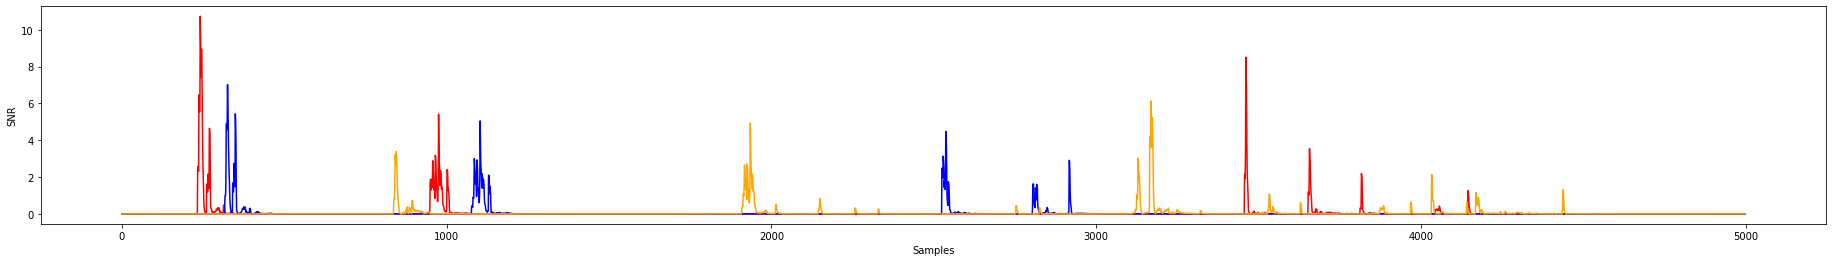

In [8]:
fig, ax = plt.subplots(figsize=(32, 4))
ax.plot(results[0,0,0:5000], color='red')
#ax.plot(results[0,1,0:5000], color='green')
ax.plot(results[0,2,0:5000], color='blue')
ax.plot(results[0,15,0:5000], color='orange')

ax.set_xlabel('Samples')
ax.set_ylabel('SNR')
plt.show()

## CPA with SCARR

With the following code, we perform a Correlation Power Analysis with the HammingWeight (HW) power model.

In [9]:
from scarr.engines.cpa import CPA as cpa
from scarr.file_handling.trace_handler import TraceHandler as th
from scarr.models.subBytes_weight import SubBytes_weight
from scarr.container.container import Container, ContainerOptions

In [10]:
handler2 = th(fileName=dataset_name)
model = SubBytes_weight()
engine2 = cpa(model)
container2 = Container(options=ContainerOptions(engine=engine2, handler=handler2), byte_positions = [x for x in range(16)])

opened zarr file  benchmark_medium_sw_aes128_compressed.zarr


Executing the following cell will run the computation.

In [11]:
container2.run()

Fetching the results ...

In [12]:
results2 = container2.engine.get_result()

Looking at the results.shape is helpful to understand. Here: (tile, byte position, convergence_step, key candidate, sample) = (1,16,1,256,70000)

In [13]:
results2.shape

(1, 16, 1, 256, 70000)

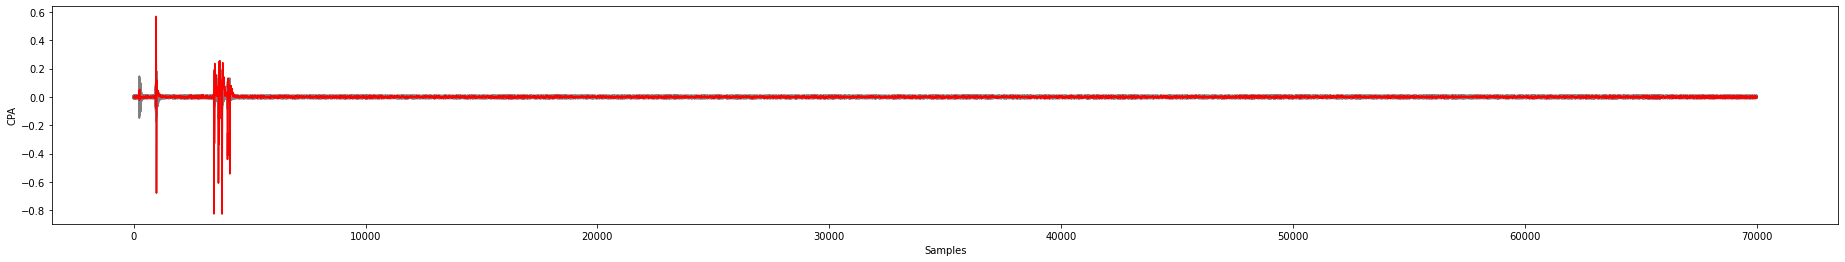

In [14]:
fig, ax = plt.subplots(figsize=(32, 4))
ax.plot(results2[0,0,0,:,:].T, color='gray')
ax.plot(results2[0,0,0,dataset["0/0/key"][0,0],:].T, color='red')

ax.set_xlabel('Samples')
ax.set_ylabel('CPA')
plt.show()

## MIA with SCARR

With the following code, we perform a Mutual Information Analysis with the HammingWeight (HW) power model and chosen number of bins.

In [ ]:
from scarr.engines.mia import MIA as mia
from scarr.file_handling.trace_handler import TraceHandler as th
from scarr.models.subBytes_weight import SubBytes_weight
from scarr.container.container import Container, ContainerOptions

In [ ]:
handler3 = th(fileName=dataset_name)#, batchStart=5000)
model = SubBytes_weight()
bin_num = 9
engine3 = mia(model, bin_num)
container3 = Container(options=ContainerOptions(engine=engine3, handler=handler3), slice=[0,5000], byte_positions = [x for x in range(16)])

Executing the following cell will run the computation.

In [ ]:
container3.run()


Let us check the returned key candidates

In [ ]:
results3 = container3.engine.get_result()
candidates = engine3.get_candidate()
print(candidates)

In [ ]:
dataset["0/0/key"][0,:]